In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
color = "#01748F"
user = "lgiesen"
repo = "forest_height"
!git clone https://github.com/{user}/{repo}.git

Cloning into 'forest_height'...
remote: Enumerating objects: 757, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 757 (delta 234), reused 310 (delta 162), pack-reused 348
Receiving objects: 100% (757/757), 47.00 MiB | 18.80 MiB/s, done.
Resolving deltas: 100% (425/425), done.


In [3]:
%run /content/forest_height/src/load_data.py
%run /content/forest_height/src/evaluate_model.py
%run /content/forest_height/src/visualize_data.py

Train and evaluate the model on all sensible data combinations

In [5]:
from sklearn.ensemble import RandomForestRegressor
# initialize model
rf = RandomForestRegressor(random_state=42)
train_evaluate_model(rf)

color_channels
MAE: 8.441682533505396; MSE: 112.05796965952045; RMSE: 2.905457370794725; MAPE: 1.4879699135854032
color_channels_ndvi
MAE: 8.45102448032831; MSE: 111.91652268819887; RMSE: 2.9070645813824485; MAPE: 1.4887903210959446
ndvi
MAE: 9.821809368616575; MSE: 145.68930820977775; RMSE: 3.1339766062650463; MAPE: 1.706740321140117
all


/content/forest_height/src/evaluate_model.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


MAE: 8.398340259021765; MSE: 102.9832649683817; RMSE: 2.8979890025708803; MAPE: 1.5442111095984843


If the dataset utilize all features, the model achieves a minimal MAE compared to other datasets.

In [6]:
save_model(rf, "random_forest", "all")

all


/content/forest_height/src/evaluate_model.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


MAE: 8.398340259021765; MSE: 102.9832649683817; RMSE: 2.8979890025708803; MAPE: 1.5442111095984843


In [ ]:
rf = joblib.load("forest_height/models/random_forest.joblib")

Feature Importance

Feature: 0, Score: 0.05423
Feature: 1, Score: 0.06046
Feature: 2, Score: 0.05365
Feature: 3, Score: 0.03540
Feature: 4, Score: 0.05444
Feature: 5, Score: 0.04892
Feature: 6, Score: 0.04226
Feature: 7, Score: 0.05807
Feature: 8, Score: 0.04103
Feature: 9, Score: 0.04054
Feature: 10, Score: 0.07234
Feature: 11, Score: 0.12622
Feature: 12, Score: 0.07256
Feature: 13, Score: 0.10463
Feature: 14, Score: 0.13525


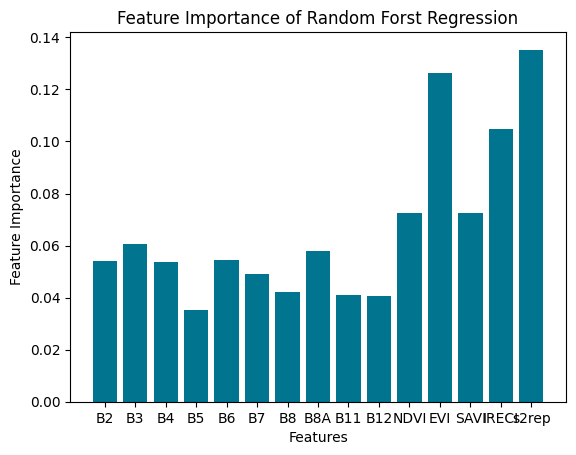

In [7]:
feature_importance(rf, "Random Forst")

The most crucial features seem to be all vegetation indices (NDVI, EVI, SAVI, IRECI, s2rep).

Predictions vs True Values

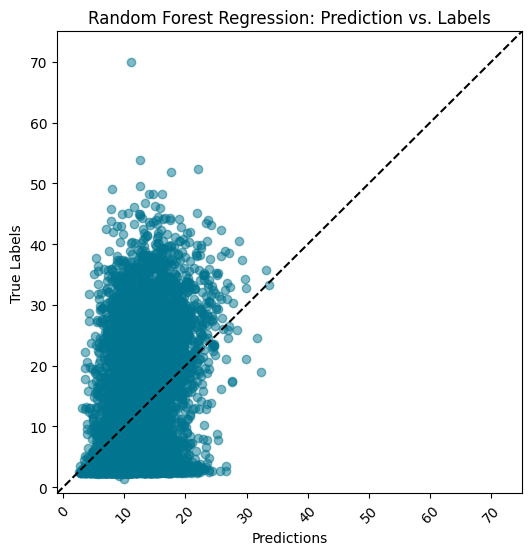

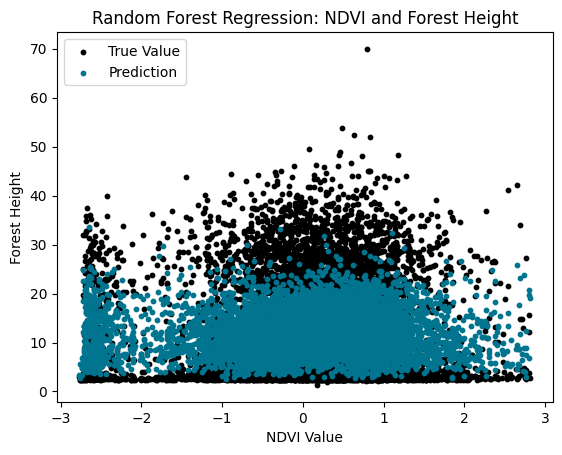

In [8]:
pred_vs_true(rf, "Random Forest")

The random forest regression is able to predict the whole spectrum of tree heights.

Predict exemplary image

In [9]:
%run forest_height/src/generate_data.py
%run forest_height/src/predict_data.py

<Figure size 640x480 with 0 Axes>

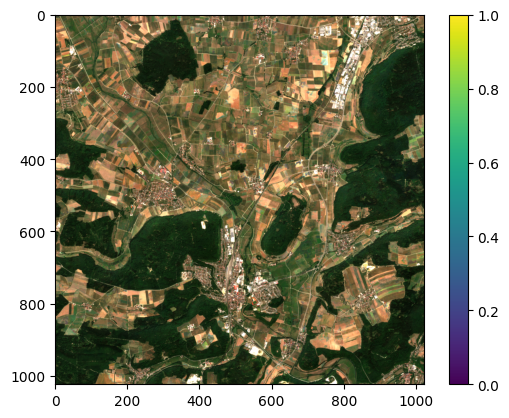

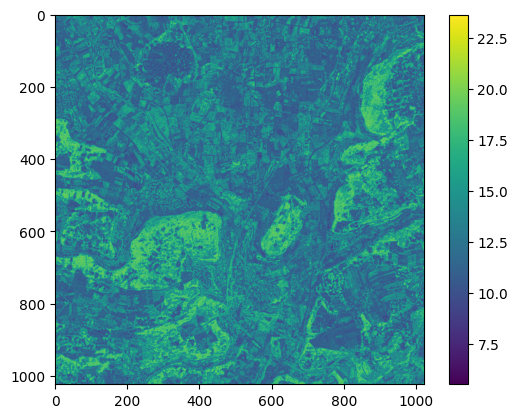

(array([[[ 356,  382,  454, ...,  684,  666,  655],
         [ 370,  378,  413, ...,  639,  637,  641],
         [ 374,  368,  389, ...,  614,  639,  644],
         ...,
         [ 245,  280,  308, ...,  247,  317,  320],
         [ 260,  298,  283, ...,  288,  307,  303],
         [ 248,  246,  239, ...,  293,  298,  314]],
 
        [[ 569,  593,  706, ...,  979,  991,  966],
         [ 567,  576,  642, ...,  966,  976,  977],
         [ 576,  588,  606, ...,  934,  971,  965],
         ...,
         [ 448,  500,  510, ...,  455,  525,  602],
         [ 462,  522,  531, ...,  508,  557,  556],
         [ 416,  426,  448, ...,  506,  584,  570]],
 
        [[ 515,  527,  664, ..., 1144, 1228, 1197],
         [ 490,  486,  572, ..., 1102, 1183, 1233],
         [ 476,  473,  480, ..., 1069, 1155, 1233],
         ...,
         [ 247,  294,  296, ...,  253,  286,  307],
         [ 268,  342,  310, ...,  278,  311,  309],
         [ 243,  244,  242, ...,  284,  295,  310]],
 
        ...,


In [10]:
pred_img(
    filepath=f'{path_images}{get_files(path_images)[3]}',
    features=['color_channels', 'NDVI', 'VI'],
    model=rf)

In [ ]:
load_data("color_channels")
# initialize model
rf_color_channels = RandomForestRegressor(random_state=42)
# train model
rf_color_channels.fit(X_train, y_train)
# predict test set
y_pred = rf_color_channels.predict(X_test)
mae_color_channels, mse_color_channels, rmse_color_channels, mape_color_channels = evaluate_model(y_test, y_pred)

MAE: 10.83361410394242; MSE: 165.3802201289557; RMSE: 3.2914455948629047; MAPE: 1.288705239750867


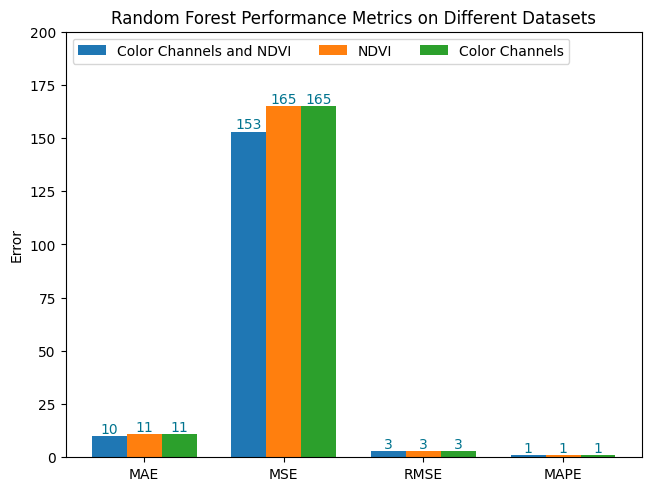

In [ ]:
group = ("MAE", "MSE", "RMSE", "MAPE")
errors = {
    'Color Channels and NDVI': (mae_color_channels_ndvi, mse_color_channels_ndvi, rmse_color_channels_ndvi, mape_color_channels_ndvi),
    'NDVI': (mae_ndvi, mse_ndvi, rmse_ndvi, mape_ndvi),
    'Color Channels': (mae_color_channels, mse_color_channels, rmse_color_channels, mape_color_channels),
}

x = np.arange(len(group))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in errors.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement), width, label=attribute)
    ax.bar_label(rects, padding=0, color="#01748F")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('Random Forest Performance Metrics on Different Datasets')
ax.set_xticks(x + width, group)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)

plt.show()

Random Forest performs similarly on every dataset. It is worth noting that color channels and NDVI combined yield slightly better results than the rest.

### Random Search

In [ ]:
X_train, y_train, X_test, y_test = load_data("ndvi")
#reshape
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
# initialize model
rf_ndvi = RandomForestRegressor(random_state=42)
# train model
rf_ndvi.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
import numpy as np
# Number of trees in random forest
n_estimators = [100, 300, 500] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['absolute_error'],
               'bootstrap': bootstrap}

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# initialize model
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    # scoring="neg_mean_absolute_error", # strategy to evaluate the performance
    n_iter=100,
    cv=3, # k-fold cross-validation
    verbose=2, # the higher, the more messages
    random_state=42,
    #n_jobs=-1, # use all processors
    return_train_score=True)

# train model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 3.2min
[CV] END bootstrap=False, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 4.4min
[CV] END bootstrap=False, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 3.7min
[CV] END bootstrap=True, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  20.4s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  23.7s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_spl

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['absolute_error'],
                                        'max_depth': [1, 25, 50, 75, 100],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, return_train_score=True, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 1,
 'criterion': 'absolute_error',
 'bootstrap': True}

In [ ]:
X_train, y_train, X_test, y_test = load_data("ndvi")
# reshape to fit model
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
# predict test set
y_pred = rf_random.predict(X_test)
mae_nvdi, mse_nvdi, rmse_nvdi, mape_nvdi = evaluate_model(y_test, y_pred)

MAE: 10.021537493308648; MSE: 136.5169536595948; RMSE: 3.165681205255616; MAPE: 1.2434139977359764


In [ ]:
import joblib
%cd forest_height/models
# save model
joblib.dump(rf_random, f'random_forest_NDVI_{round(mae_nvdi, 2)}.joblib')
# load model with:
%cd ../../
# rf_random = joblib.load("forest_height/models/random_forest_random_search_NDVI_10.02.joblib")

/content/forest_height/models
/content


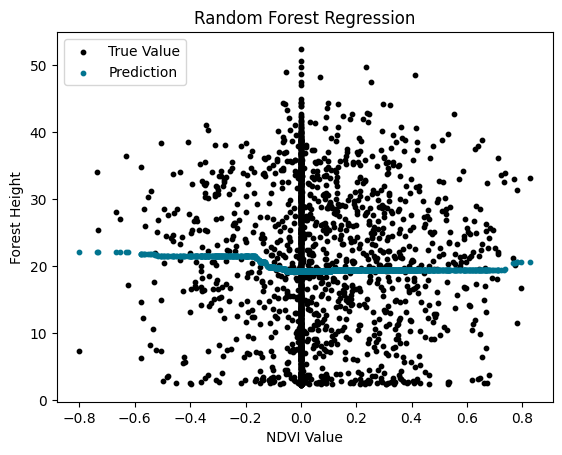

In [ ]:
from matplotlib import pyplot as plt
# only the NDVI channel is plotted on the x-axis
# because 11-dimensional data cannot be visualized for humans
fig, ax = plt.subplots()
plt.scatter(X_test, y_test, 10, color = 'black')
plt.scatter(X_test, y_pred, 10, color = '#01748F')
plt.title('Random Forest Regression')
plt.xlabel('NDVI Value')
plt.ylabel('Forest Height')
ax.legend(("True Value", "Prediction"), loc='upper left')
plt.show()